In [1]:
library(readxl)

In [2]:
pl = read_excel('football dataset.xlsx')

In [3]:
str(pl)

Classes 'tbl_df', 'tbl' and 'data.frame':	4070 obs. of  114 variables:
 $ Column1                 : num  0 1 2 3 4 5 6 7 8 9 ...
 $ home_team               : chr  "Blackpool" "Liverpool" "Manchester United" "Stoke City" ...
 $ away_team               : chr  "West Bromwich Albion" "Manchester City" "Arsenal" "Aston Villa" ...
 $ result_full             : chr  "2-1" "3-0" "1-0" "2-1" ...
 $ result_ht               : chr  "1-0" "3-0" "1-0" "0-1" ...
 $ goal_home_ft            : num  2 3 1 2 0 3 0 1 2 3 ...
 $ goal_away_ft            : num  1 0 0 1 0 0 0 2 2 0 ...
 $ winner                  : chr  "Blackpool" "Liverpool" "Manchester United" "Stoke City" ...
 $ home_team_pts           : chr  "3" "3" "3" "3" ...
 $ away_team_pts           : chr  "0" "0" "0" "0" ...
 $ home_clearances         : num  15 16 26 26 50 15 30 9 44 24 ...
 $ home_corners            : num  8 6 5 8 4 5 5 10 4 5 ...
 $ home_fouls_conceded     : num  16 6 9 12 11 9 12 10 6 13 ...
 $ home_offsides           : num  2 5 3 

In [4]:
summary(pl)

    Column1      home_team          away_team         result_full       
 Min.   :   0   Length:4070        Length:4070        Length:4070       
 1st Qu.:1017   Class :character   Class :character   Class :character  
 Median :2034   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2034                                                           
 3rd Qu.:3052                                                           
 Max.   :4069                                                           
                                                                        
  result_ht          goal_home_ft    goal_away_ft      winner         
 Length:4070        Min.   :0.000   Min.   :0.000   Length:4070       
 Class :character   1st Qu.:1.000   1st Qu.:0.000   Class :character  
 Mode  :character   Median :1.000   Median :1.000   Mode  :character  
                    Mean   :1.536   Mean   :1.201                     
                    3rd Qu.:2.000   3rd Qu.:2.000            

In [4]:
library(dplyr)
library(ggplot2)

In [4]:
options(warn = -1)

## MOST POINTS

### Most Points at Home

In [5]:
most.pts.home =  pl %>% group_by(home_team) %>% 
  summarise(Points = sum(home_team_pts)) 

ERROR: Error in sum(home_team_pts): invalid 'type' (character) of argument


#### error is coming from sum since R can't sum characters

In [6]:
class(pl$home_team_pts)

[1] "character"

In [5]:
pl$home_team_pts = as.numeric(pl$home_team_pts)
pl$away_team_pts = as.numeric(pl$away_team_pts)

In [14]:
most.pts.home =  pl %>% group_by(home_team) %>% 
  summarise(Points.home = sum(home_team_pts))  %>% 
  arrange(desc(Points.home))  %>% slice(1:12)

In [15]:
most.pts.home

home_team,Points.home
Manchester City,504
Manchester United,440
Chelsea,435
Arsenal,431
Liverpool,428
Tottenham Hotspur,415
Everton,361
West Ham United,271
Newcastle United,267
Stoke City,235


### Most Points in Away Matches

In [16]:
most.pts.away = pl %>% group_by(away_team) %>% 
  summarise(Points.away = sum(away_team_pts)) %>% 
  arrange(desc(Points.away))  %>% slice(1:12)

In [17]:
most.pts.away

away_team,Points.away
Manchester City,387
Manchester United,354
Chelsea,342
Liverpool,336
Tottenham Hotspur,325
Arsenal,307
Everton,237
Southampton,194
West Ham United,180
Crystal Palace,171


In [12]:
most_points = cbind(most.pts.home, most.pts.away)

In [13]:
most_points = most_points %>% mutate(Points = Points.home + Points.away) %>% 
  arrange(desc(Points)) %>% select(home_team, Points)  %>% slice(1:15)  %>% 
  rename(Team = home_team)

In [26]:
most_points

Team,Points
Manchester City,891
Manchester United,794
Chelsea,777
Liverpool,764
Tottenham Hotspur,740
Arsenal,738
Everton,598
West Ham United,451
Newcastle United,437
Southampton,426


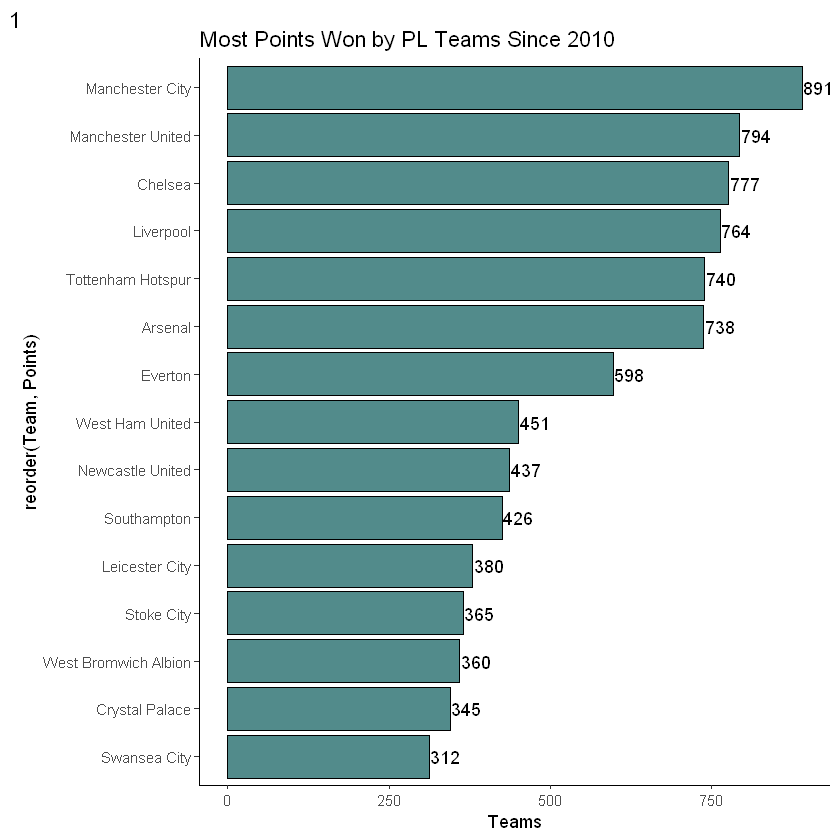

In [28]:
ggplot(most_points, aes(reorder(Team, Points),Points, fill = Team)) + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Points, hjust = -0.05))+
  labs(title = 'Most Points Won by PL Teams Since 2010', y = 'Teams', tag = '1')

## MOST GOALS

### Most Goals in Home Matches

In [155]:
goals.home = pl %>% group_by(home_team) %>% 
  summarise(goals.h = sum(goal_home_ft))  %>% 
  arrange(desc(goals.h)) %>% slice(1:10)

In [156]:
goals.home

home_team,goals.h
Manchester City,527
Liverpool,428
Arsenal,414
Chelsea,409
Manchester United,408
Tottenham Hotspur,372
Everton,334
West Ham United,268
Newcastle United,256
Southampton,236


### Most Goals in Away Matches

In [159]:
goals.away = pl %>% group_by(away_team) %>% 
  summarise(goals.aw = sum(goal_away_ft)) %>% 
  arrange(desc(goals.aw))  %>% slice(1:12)

In [160]:
goals.away

away_team,goals.aw
Manchester City,387
Liverpool,347
Manchester United,328
Tottenham Hotspur,326
Chelsea,324
Arsenal,323
Everton,233
West Ham United,205
Southampton,187
Leicester City,186


In [17]:
most.goals = cbind(goals.home, goals.away)

In [18]:
most.goals = most.goals %>% mutate(Goals = goals.h + goals.aw) %>% 
  arrange(desc(Goals)) %>% select(home_team,Goals)  %>% slice(1:12)  %>% 
  rename(Teams = home_team)

In [19]:
most.goals

Teams,Goals
Manchester City,914
Liverpool,775
Arsenal,737
Manchester United,736
Chelsea,733
Tottenham Hotspur,698
Everton,567
West Ham United,473
Newcastle United,430
Southampton,423


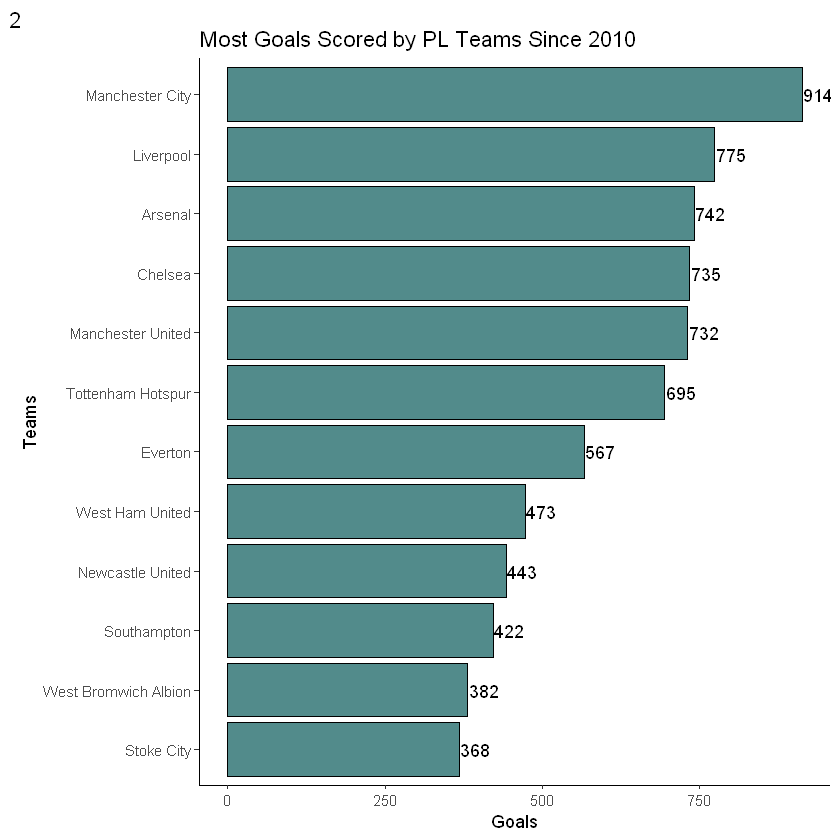

In [26]:
ggplot(most.goals, aes(reorder(Team, Goals), Goals, fill = Team)) + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Goals, hjust = -0.05))+
  labs(title = 'Most Goals Scored by PL Teams Since 2010', x = 'Teams', tag = '2')

## POSSESSION STATS

### Most Possession in Home Matches

In [28]:
home.poss = pl %>% group_by(home_team) %>% 
  summarise(avg.home.poss = mean(home_possession))  %>% 
  arrange(desc(avg.home.poss))  %>% slice(1:12)

In [29]:
home.poss

home_team,avg.home.poss
Manchester City,62.68732
Leeds United,61.69231
Liverpool,59.82157
Arsenal,59.17044
Chelsea,57.87931
Manchester United,57.84926
Tottenham Hotspur,57.01429
Swansea City,53.69398
Wigan Athletic,53.24561
Southampton,52.21939


### Most Possession in Away Matches

In [30]:
away.poss = pl %>% group_by(away_team) %>% 
  summarise(avg.away.poss = mean(away_possession))  %>% 
  arrange(desc(avg.away.poss))  %>% slice(1:12)

In [31]:
away.poss

away_team,avg.away.poss
Manchester City,60.71133
Leeds United,59.13077
Liverpool,57.28571
Chelsea,56.78431
Arsenal,56.68873
Tottenham Hotspur,55.47624
Manchester United,55.42293
Southampton,50.96145
Swansea City,50.91429
Everton,50.16355


In [23]:
most.possession = cbind(home.poss, away.poss)

In [24]:
most.possession = most.possession %>% 
  mutate(Avg_Possession = round(((avg.home.poss + avg.away.poss)/2),digits = 2)) %>% 
  select(home_team, Avg_Possession) %>% arrange(desc(Avg_Possession)) %>% slice(1:15)  %>% 
  rename(Team = home_team)  %>%   mutate(new.col = Avg_Possession/100)

In [76]:
most.possession$Avg_Possession = paste0(most.possession$Avg_Possession,'%')

In [77]:
most.possession

Team,Avg_Possession
Manchester City,61.7%
Leeds United,60.41%
Liverpool,58.55%
Arsenal,57.93%
Chelsea,57.33%
Manchester United,56.64%
Tottenham Hotspur,56.25%
Swansea City,52.3%
Southampton,51.59%
Wigan Athletic,51.59%


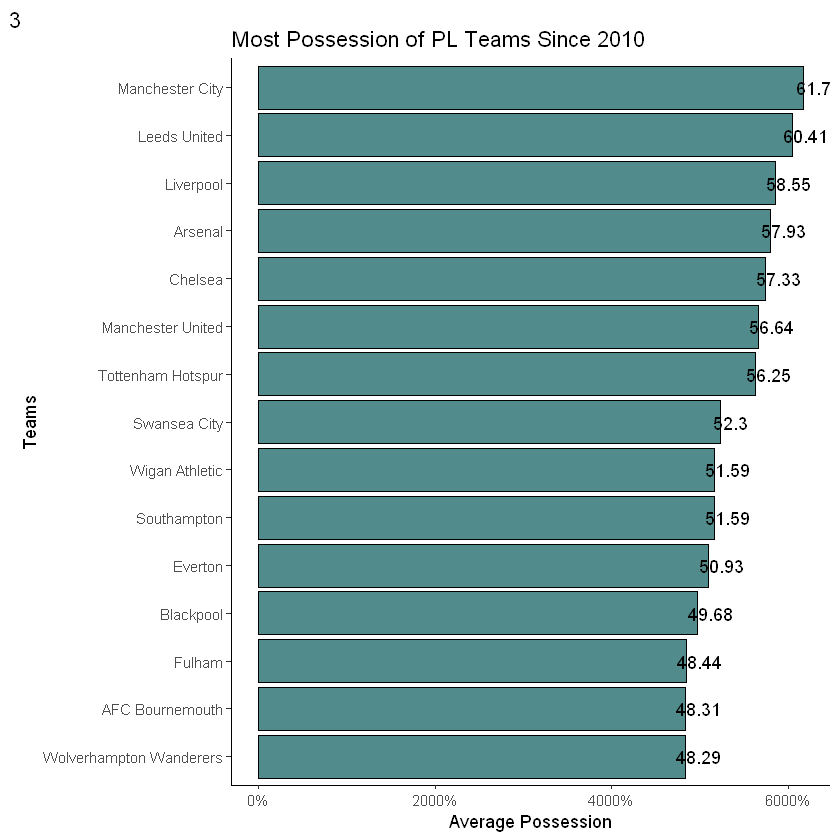

In [32]:
ggplot(most.possession, aes(reorder(Team, Avg_Possession),Avg_Possession, fill =Team))+ 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Avg_Possession, hjust = 0.2))+
  labs(title = 'Most Possession  PL Teams Since 2010', x = 'Teams', tag = '3',
       y = 'Average Possession') +
scale_y_continuous(labels = function(Avg_Possession.2) paste0(Avg_Possession.2*100, "%"))

## MOST WINS

In [34]:
most.wins = pl %>% group_by(winner) %>% 
  summarise(Wins = n()) %>% filter(winner != 'Draw') %>% 
  arrange(desc(Wins)) %>% rename(Team = winner) %>% slice(1:12) %>% print() 

# A tibble: 12 x 2
   Team               Wins
   <chr>             <int>
 1 Manchester City     275
 2 Manchester United   232
 3 Chelsea             229
 4 Liverpool           223
 5 Tottenham Hotspur   216
 6 Arsenal             215
 7 Everton             160
 8 West Ham United     118
 9 Newcastle United    117
10 Southampton         112
11 Leicester City      107
12 Crystal Palace       94


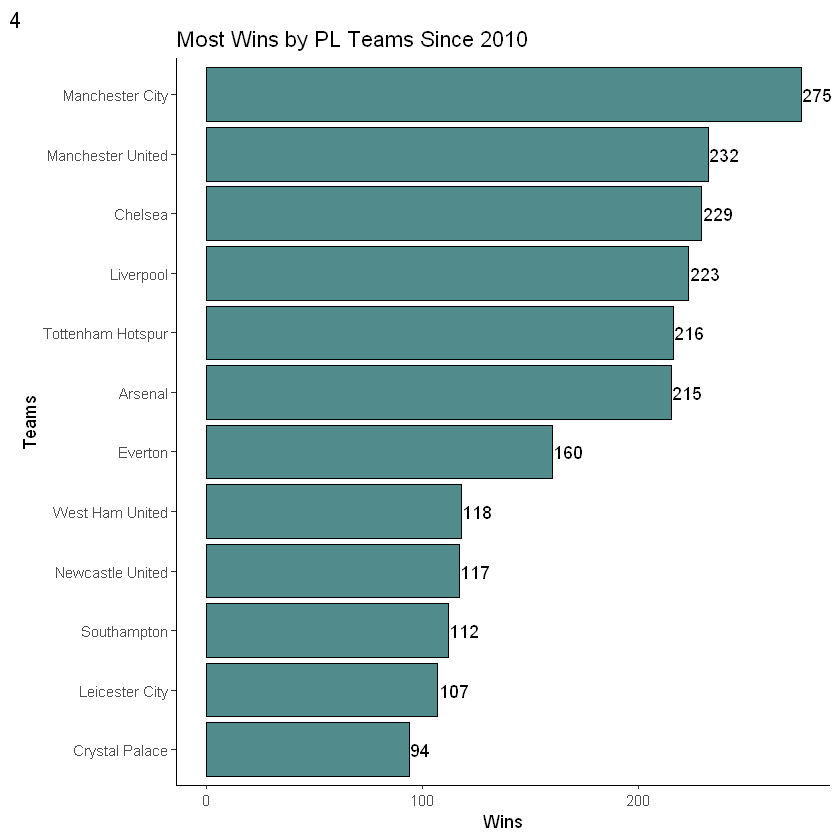

In [37]:
ggplot(most.wins, aes(reorder(Team, Wins), Wins, fill = Team)) + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Wins, hjust = -0.05))+
  labs(title = 'Most Wins by PL Teams Since 2010', x = 'Teams', tag = '4',
       y = 'Wins')

In [34]:
home.matches =  pl %>% group_by(home_team) %>% 
  summarise(matches = n()) 

away.matches = pl %>% group_by(away_team) %>% 
  summarise(matches.away = n())

most.matches = cbind(home.matches, away.matches)

most.matches = most.matches %>% mutate(Total.Matches = matches + matches.away) %>% 
  arrange(desc(Total.Matches)) %>% select(home_team, Total.Matches)

## Goals Per Match Ratio

### Goals Per Match Ratio in Home Matches

In [82]:
home.gpm = cbind(goals.home, home.matches)

In [148]:
ratio.gpm.home = home.gpm %>% mutate(Ratio = goals.h/matches) %>% 
  select(home_team, Ratio)  %>% arrange(desc(Ratio))  %>% slice(1:15) %>% rename(Teams = home_team)
  
ratio.gpm.home

Teams,Ratio
Manchester City,2.570732
Liverpool,2.098039
Arsenal,2.039409
Chelsea,2.014778
Manchester United,2.009852
Tottenham Hotspur,1.832512
Everton,1.645320
Blackpool,1.578947
Leicester City,1.559055
Bolton Wanderers,1.500000


In [ ]:
away.gpm = cbind(goals.away, away.matches)

In [151]:
ratio.gpm.away = away.gpm %>% mutate(A.Ratio = goals.aw/matches.away) %>% 
  select(col2, A.Ratio)  %>% rename(Teams = col2)  %>% arrange(desc(A.Ratio)) %>% slice(1:12)

ratio.gpm.away

Teams,A.Ratio
Manchester City,1.906404
Leeds United,1.846154
Liverpool,1.709360
Tottenham Hotspur,1.613861
Manchester United,1.600000
Chelsea,1.588235
Arsenal,1.583333
Leicester City,1.441860
Blackpool,1.315789
Blackburn Rovers,1.210526


In [87]:
goals.per.match = cbind(ratio.gpm.home, ratio.gpm.away)

In [88]:
goals.per.match = goals.per.match %>% 
  mutate(Goals.Per.Matches= round((Ratio+A.Ratio)/2, digits = 3)) %>% 
  select(home_team, Goals.Per.Matches) 

In [65]:
goals.per.match.top10 = goals.per.match %>% slice(1:10) %>% 
  rename(Teams = home_team)

goals.per.match.top10

Teams,Goals.Per.Matches
Manchester City,2.239
Liverpool,1.904
Arsenal,1.811
Manchester United,1.805
Chelsea,1.802
Tottenham Hotspur,1.723
Leeds United,1.654
Leicester City,1.500
Blackpool,1.447
Everton,1.397


In [66]:
goals.per.match.last15 = goals.per.match[23:37, ]

goals.per.match.last15

,home_team,Goals.Per.Matches
23,Crystal Palace,1.110
24,West Bromwich Albion,1.092
25,Stoke City,1.072
26,Aston Villa,1.055
27,Sunderland,1.053
28,Queens Park Rangers,1.009
29,Norwich City,0.979
30,Birmingham City,0.974
31,Burnley,0.967
32,Brighton and Hove Albion,0.957


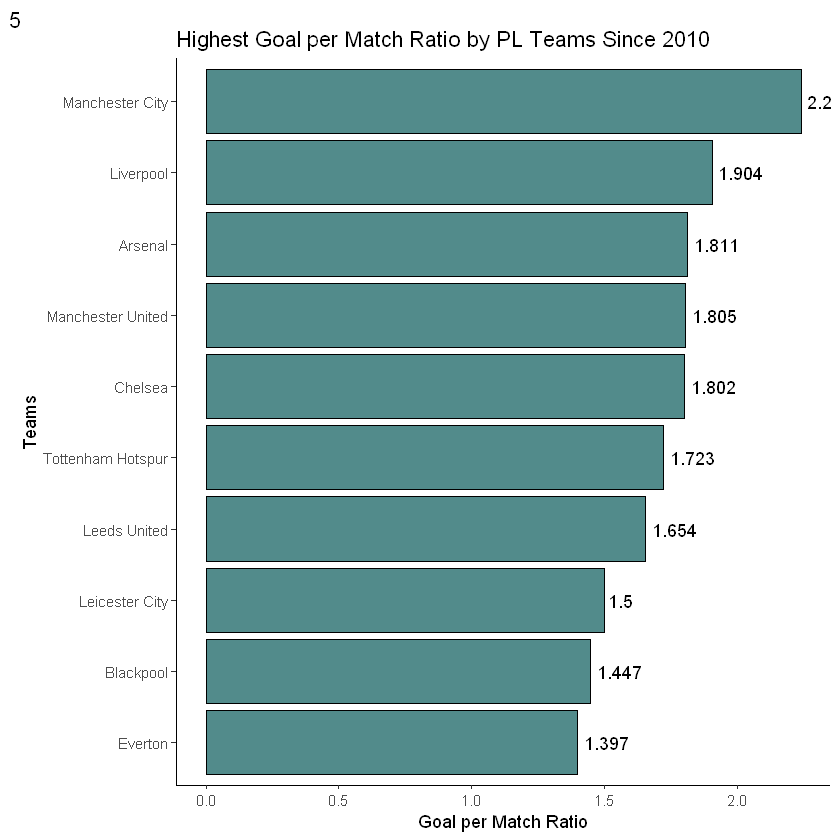

In [69]:
ggplot(goals.per.match.top10, aes(reorder(Teams, Goals.Per.Matches),Goals.Per.Matches))+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Goals.Per.Matches, hjust = -0.15))+
  labs(title = 'Highest Goal per Match Ratio by PL Teams Since 2010',
       x = 'Teams', tag = '5', y = 'Goal per Match Ratio')

## MOST SHOTS TAKEN

### Most Shots Taken per Match in Home Matches

In [130]:
shots.home = pl %>% group_by(home_team) %>% 
  summarise(h.shots = sum(home_shots))  %>% 
  rename(Teams= home_team)

In [131]:
shots.home = cbind(home.matches,shots.home)

In [132]:
shots.home = shots.home %>% 
  mutate(var1 = round(h.shots/matches, digits = 2)) %>% 
  select(Teams, var1)  %>% arrange(desc(var1))  %>% slice(1:15)  

In [133]:
shots.home

Teams,var1
Manchester City,18.75
Liverpool,18.39
Chelsea,17.87
Tottenham Hotspur,17.48
Arsenal,16.41
Manchester United,16.13
Queens Park Rangers,15.44
Blackpool,15.42
Fulham,14.84
Bolton Wanderers,14.82


### Most Shots Taken at Away Matches

In [140]:
shots.away = pl %>% group_by(away_team) %>% 
  summarise(a.shots = sum(away_shots))  %>% 
  rename(a.team = away_team)

In [141]:
shots.away = cbind(away.matches, shots.away)

In [142]:
shots.away = shots.away %>% 
  mutate(var2 = round(a.shots/matches.away, 2)) %>% select(away_team, var2) %>% 
  arrange(desc(var2))  %>% slice(1:15) 

In [143]:
shots.away

away_team,var2
Manchester City,15.89
Chelsea,14.66
Liverpool,14.56
Leeds United,14.08
Tottenham Hotspur,13.94
Bolton Wanderers,13.21
Arsenal,12.81
Manchester United,12.59
Blackpool,12.53
Queens Park Rangers,12.16


In [125]:
shots = cbind(shots.home, shots.away)

In [126]:
shots = shots %>% mutate(Shots.per.match = round((var1+var2)/2,digits = 2 )) %>% 
  select(Teams, Shots.per.match)  %>% arrange(desc(Shots.per.match)) %>% slice(1:18)

In [127]:
shots

Teams,Shots.per.match
Manchester City,17.32
Liverpool,16.48
Chelsea,16.27
Tottenham Hotspur,15.71
Arsenal,14.61
Manchester United,14.36
Leeds United,14.12
Bolton Wanderers,14.02
Blackpool,13.97
Queens Park Rangers,13.80


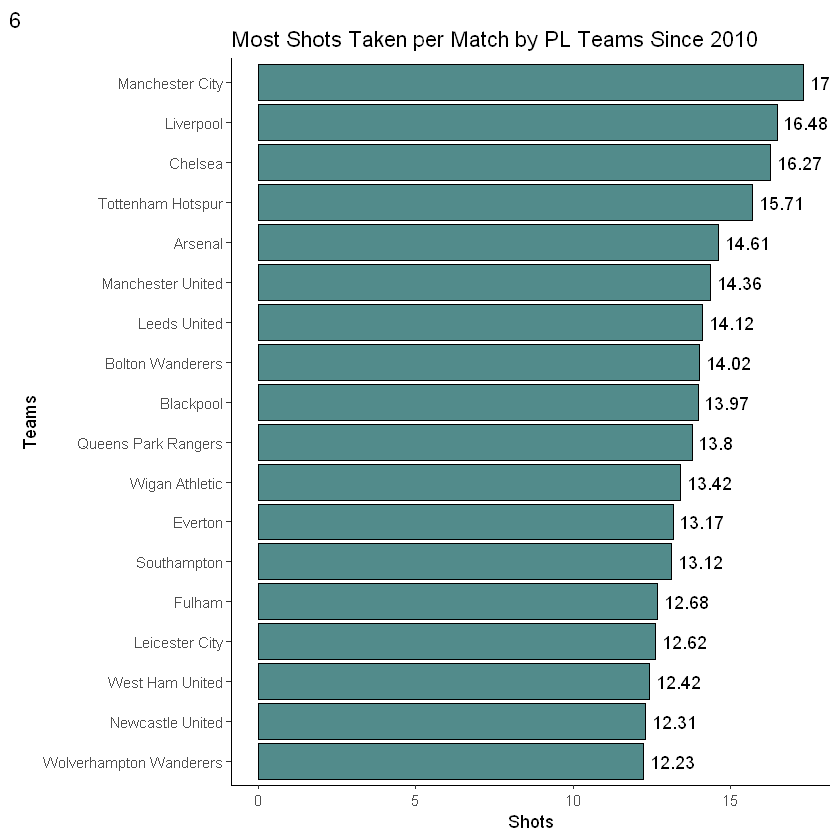

In [76]:
ggplot(shots, aes(reorder(Teams, Shots.per.match), Shots.per.match)) + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Shots.per.match, hjust = -0.15))+
  labs(title = 'Most Shots Taken per Match by PL Teams Since 2010',
       x = 'Teams', tag = '6', y = 'Shots')

## SHOTS ON TARGET

### In Home Matches

In [66]:
shots.h.target = pl %>% group_by(home_team) %>% 
  summarise(h.shots = sum(home_shots_on_target))  %>% 
  rename(col1 = home_team)

In [67]:
shots.h.target = cbind(home.matches,shots.h.target)

In [68]:
shots.h.target = shots.h.target %>% 
  mutate(var1 = round(h.shots/matches, digits = 2)) %>% 
  select(home_team, var1) %>% rename(Teams = home_team)  %>% 
  arrange(desc(var1))  %>% slice(1:14)

In [69]:
shots.h.target

Teams,var1
Manchester City,6.76
Chelsea,6.38
Liverpool,6.35
Arsenal,6.08
Tottenham Hotspur,5.98
Manchester United,5.88
Leeds United,5.46
Fulham,4.99
Everton,4.97
Bolton Wanderers,4.84


### In Away Matches

In [74]:
shots.a.target = pl %>% group_by(away_team) %>% 
  summarise(a.shots = sum(away_shots_on_target))  %>% 
  rename(col2 = away_team)

In [75]:
shots.a.target = cbind(away.matches, shots.a.target)

In [76]:
shots.a.target = shots.a.target %>% 
  mutate(var2 = round(a.shots/matches.away, 2)) %>% 
  select(away_team, var2)  %>%  arrange(desc(var2))

In [77]:
shots.a.target

away_team,var2
Manchester City,5.49
Leeds United,5.31
Liverpool,5.29
Tottenham Hotspur,4.93
Chelsea,4.79
Manchester United,4.74
Arsenal,4.69
Leicester City,4.18
Blackpool,4.11
Everton,4.07


In [97]:
shots.target = cbind(shots.h.target, shots.a.target)

In [98]:
shots.target = shots.target %>% 
  mutate(Shots.per.match = round((var1+var2)/2,digits = 2 )) %>% 
  select(Teams, Shots.per.match) %>% arrange(desc(Shots.per.match)) %>% 
  slice(1:15) %>% rename(Shots.On.Target = Shots.per.match)

In [100]:
shots.target

Teams,Shots.On.Target
Manchester City,6.12
Liverpool,5.82
Chelsea,5.58
Tottenham Hotspur,5.46
Arsenal,5.38
Leeds United,5.38
Manchester United,5.31
Everton,4.52
Bolton Wanderers,4.42
Southampton,4.40


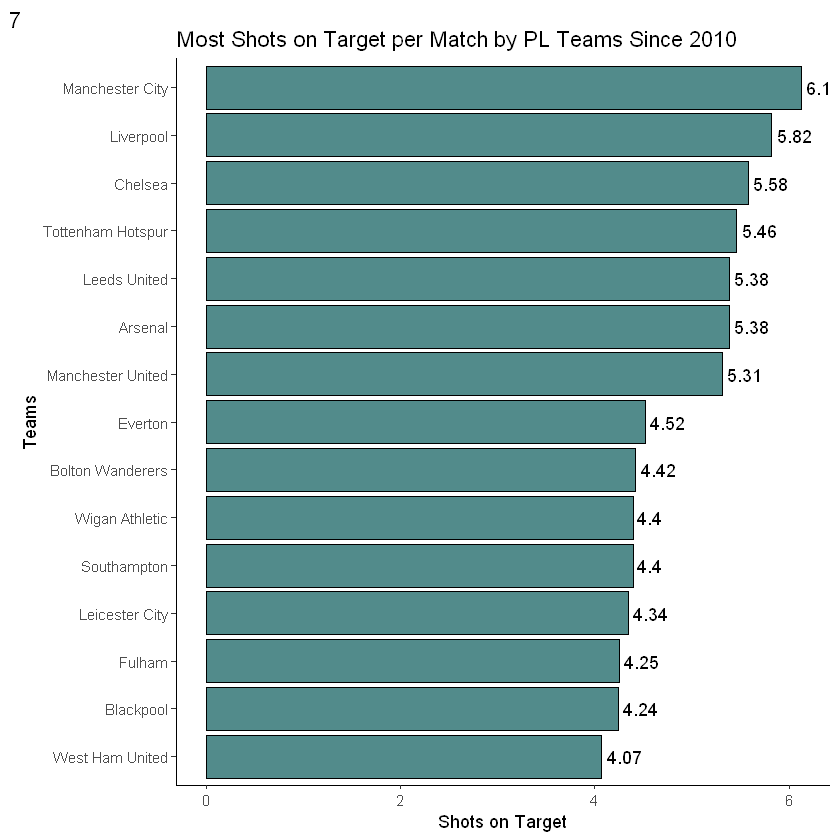

In [101]:
ggplot(shots.target, aes(reorder(Teams, Shots.On.Target), Shots.On.Target)) + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Shots.On.Target, hjust = -0.15))+
  labs(title = 'Most Shots on Target per Match by PL Teams Since 2010',
       x = 'Teams', tag = '7', y = 'Shots on Target')

## Best Shot Conversion Ratio

In [106]:
scr = cbind(goals.per.match, shots)

In [107]:
scr = scr %>% 
  mutate(Conversion.Rate =round(Goals.Per.Matches/Shots.per.match*100, digits = 2)) %>% 
  select(Teams, Conversion.Rate) %>% arrange(desc(Conversion.Rate)) %>% slice(1:20) %>% print()

                     Teams Conversion.Rate
1          Manchester City           12.93
2        Manchester United           12.57
3                  Arsenal           12.40
4           Leicester City           11.89
5             Leeds United           11.71
6                Liverpool           11.55
7                  Chelsea           11.08
8        Tottenham Hotspur           10.97
9          AFC Bournemouth           10.94
10                 Reading           10.92
11                 Everton           10.61
12        Blackburn Rovers           10.38
13               Blackpool           10.36
14         West Ham United           10.35
15            Swansea City            9.92
16                 Watford            9.77
17          Crystal Palace            9.74
18             Southampton            9.74
19 Wolverhampton Wanderers            9.65
20                 Burnley            9.57


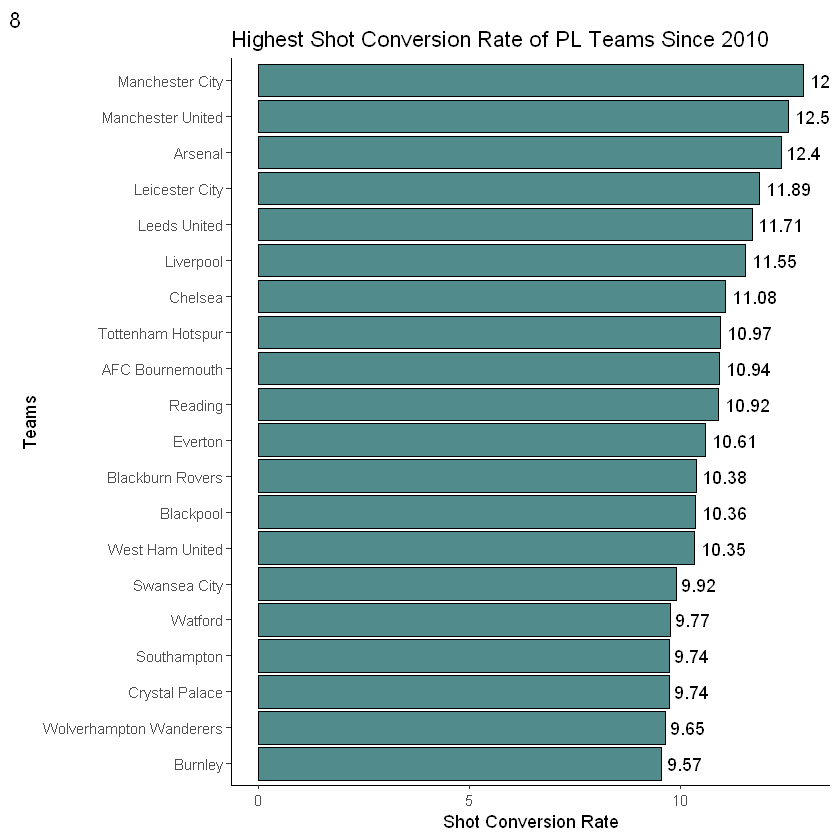

In [108]:
ggplot(scr, aes(reorder(Teams, Conversion.Rate), Conversion.Rate)) + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  coord_flip() + theme_classic() +  theme(legend.position = 'none')+
  geom_text(aes(label = Conversion.Rate, hjust = -0.15))+
  labs(title = 'Highest Shot Conversion Rate of PL Teams Since 2010',
       x = 'Teams', tag = '8', y = 'Shot Conversion Rate')


## MOST FOULS CONCEDED

In [180]:
fouls.home = pl %>% group_by(home_team) %>% 
  summarise(var1 = sum(home_fouls_conceded)) %>% 
  rename(Teams = home_team)

In [181]:
fouls.away = pl %>% group_by(away_team) %>%
  summarise(var2 = sum(away_fouls_conceded))  %>% 
  rename(c2 = away_team)

In [185]:
fouls = cbind(fouls.home, fouls.away, most.matches)

In [186]:
fouls = fouls %>%  mutate(total = var1 + var2) %>% 
  mutate(Fouls.Conceded = round(total/(matches+matches.away), digits = 2)) %>% 
  select(Teams, Fouls.Conceded) %>% arrange(desc(Fouls.Conceded))

In [188]:
fouls.15 = fouls[1:15, ] 

In [189]:
fouls.15

Teams,Fouls.Conceded
Bolton Wanderers,12.84
Middlesbrough,12.68
Blackburn Rovers,12.58
Wigan Athletic,12.57
Watford,12.27
Stoke City,11.98
Aston Villa,11.64
Blackpool,11.58
Crystal Palace,11.56
Sheffield United,11.55


In [190]:
fouls.last14 = fouls[23:37, ]

fouls.last14

,Teams,Fouls.Conceded
23,Wolverhampton Wanderers,11.03
24,Tottenham Hotspur,10.83
25,Norwich City,10.76
26,Huddersfield Town,10.75
27,Leicester City,10.68
28,West Ham United,10.66
29,Manchester City,10.60
30,Chelsea,10.51
31,Burnley,10.37
32,Reading,10.37
